In [1]:
import cv2 as cv
from pathlib import Path
# from tqdm import tqdm
import matplotlib.pyplot as plt
import sys
import numpy as np
import re
import skimage
import cv2
import os

from ipywidgets import interactive, widgets, Layout
# from imutils.paths import list_images
%matplotlib inline 

from pyhull import qconvex
from operator import attrgetter
from scipy import stats as st

This is a modified version of the script from pv-vision/tutorials.
I used this script to crop images from ASU. It is structured to loop
through eventually, but currently making the mask requires some input
from the user.

In [2]:
sys.path.append("/home/eccoope/pv-vision")
from pv_vision.transform_crop.solarmodule import MaskModule

In [4]:
path = '/projects/wg-psel-ml/EL_images/eccoope/asu3_cropped'
images = [cv.imread(os.path.join(path, file)) for file in os.listdir(path)]
files = [re.findall('(.*)\.(...)', f)[0][0] for f in os.listdir(path)]

In [46]:
i = 69


img = images[i]
img = np.rot90(img)
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)#[12:, 5:-10]
raw_module = MaskModule(img, 1, 1, 0) # 6 rows && 10 columns && 3 busbar
plt.imshow(raw_module.image, 'gray')
plt.title(files[i])

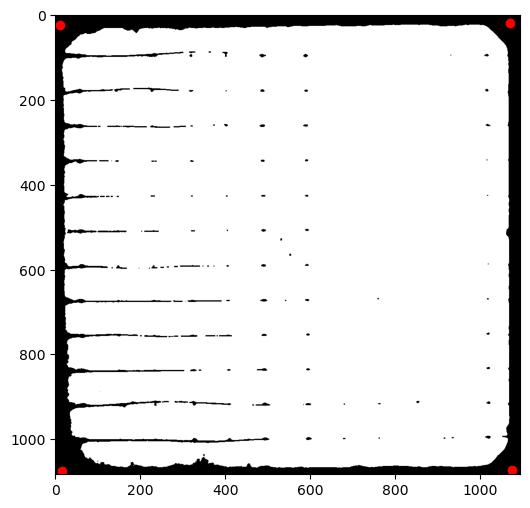

interactive(children=(IntSlider(value=4, description='mode', max=4), Output()), _dom_classes=('widget-interact…

In [47]:
## Load mask.
## Note that this is different from the transform_cnn 
## method where the mask is predicted by a cnn model.
## In this image, the background is not very complex, so
## we can use simpler computer vision method.

## we can use the slider to find the optimal threzshold value

def update_mask(thre):
    mask = raw_module.load_mask(thre=thre, output=True)
    plt.figure(figsize=(8, 6))
    plt.imshow(mask, "gray")

thre = widgets.FloatSlider(value=0.11, min=0, max=1, step=0.01)
interactive(update_mask,
            thre=thre, description="Threshold")

# detect corners, different modes are provided
# For rounded rectangle module, mode 4 is recommended

def update_corner(mode):
    corners = raw_module.corner_detection_cont(output=True, mode=mode)
    x, y = zip(*corners)

    plt.figure(figsize=(6, 8))
    plt.imshow(raw_module.mask, 'gray')
    plt.scatter(x, y, c='r')

mode=widgets.IntSlider(value=4, min=0, max=4, step=1)
interactive(update_corner,
            mode=mode)

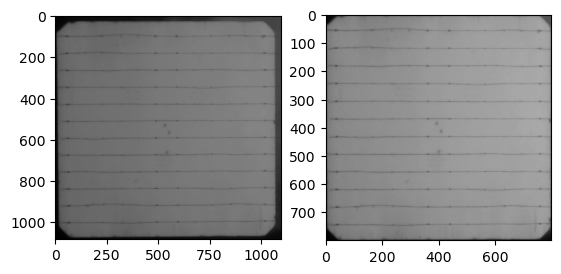

In [48]:
# transform modules
img_transformed = raw_module.transform(cellsize=800, img_only=True)
fig, ax = plt.subplots(ncols=2)

ax[0].imshow(img, 'gray')

ax[1].imshow(img_transformed, 'gray')

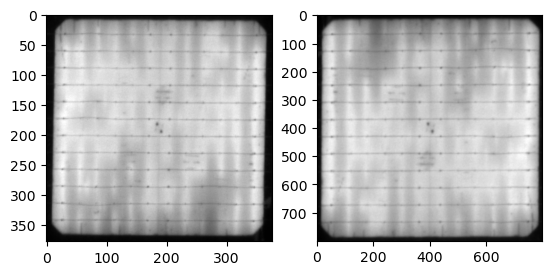

In [42]:
# transform modules
img_transformed = np.rot90(img_transformed)
fig, ax = plt.subplots(ncols=2)

ax[0].imshow(img, 'gray')

ax[1].imshow(img_transformed, 'gray')

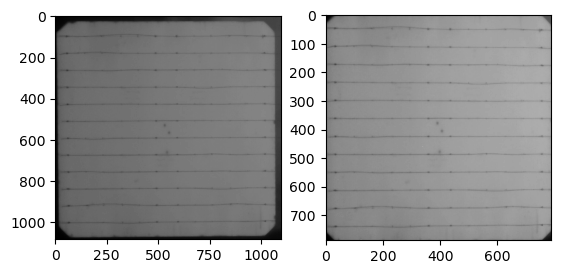

In [49]:
my_img = skimage.color.gray2rgb(img_transformed)
out = PlanarIndex(my_img)

fig, ax = plt.subplots(ncols=2)

ax[0].imshow(img, cmap = "gray")
ax[1].imshow(out, cmap='gray')
# ax[0].axis('off')
# ax[1].axis('off');

In [37]:
new_path = '/home/eccoope/el_img_cracks_ec/asu3_cropped_rotated/' + files[i] + '.jpg'

print(new_path)

plt.imsave(new_path, img_transformed)
# plt.imsave(new_path, out)

/home/eccoope/el_img_cracks_ec/asu3_cropped_rotated/0_EL_2x2_NQ-04_20230915_130134.jpg


In [50]:
new_path = '/home/eccoope/el_img_cracks_ec/asu3_cropped_rotated/' + files[i] + '.jpg'

print(new_path)

# plt.imsave(new_path, img_transformed)
plt.imsave(new_path, out)

/home/eccoope/el_img_cracks_ec/asu3_cropped_rotated/1_EL_2x2_NQ-04_20230915_130134.jpg
